In [22]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import scipy.fftpack as fml
sys.path.append('/Users/Poop/REU/VersionZeroPointZero')
sys.path.append('/Users/Poop/REU/VersionZeroPointZero')
import signal as sig
#import pulsar as puls
#import ism as ism
import math, scipy
import scipy as sp
from scipy import signal
# WHHHYYYYYY

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from matplotlib.pyplot import *

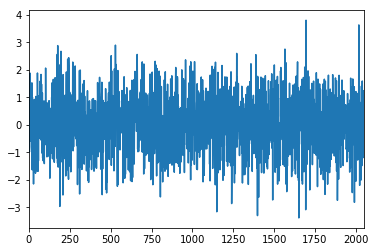

In [4]:
length = 2048
data = np.random.normal(0,1,length)
xlim(0,len(data))
plot(data)
show()

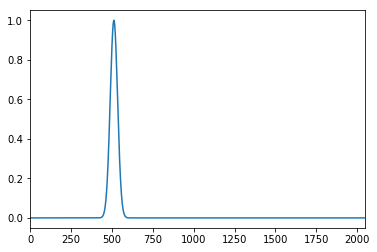

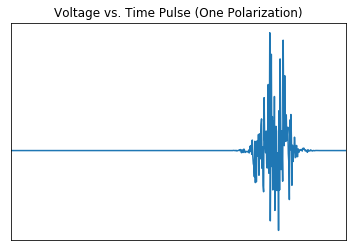

In [5]:
time = np.arange(length)
window = np.exp(-(time-512)**2/1000.0)
xlim(0,len(window))
plot(window)
show()
title("Voltage vs. Time Pulse (One Polarization)")
xticks([])
yticks([])
xlim(0,650)#len(window))
plot(window*data)
show()

In [6]:
def DataSeries(N=10):
    pulseSeries=[]
    for ii in range(10):
        pulseSeries= np.append(pulseSeries,np.random.normal(0,1,length)*window)
    dataSeries=pulseSeries + 1*np.random.normal(0,1,len(pulseSeries))
    return dataSeries,pulseSeries
dataSeries, pulseSeries= DataSeries()
print DataSeries()

(array([-0.04166515,  0.53704731, -0.42603327, ..., -0.67141016,
        0.9269119 , -1.8804542 ]), array([ -1.27327434e-115,  -3.67116913e-114,   1.39192836e-113, ...,
        -0.00000000e+000,   0.00000000e+000,  -0.00000000e+000]))


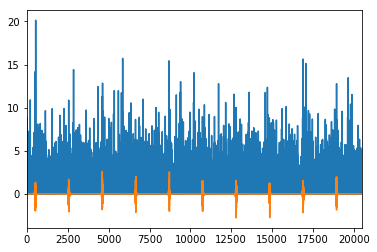

In [7]:
xlim(0,len(dataSeries))
plot(dataSeries**2)
plot(pulseSeries)
show()

/Users/Poop/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


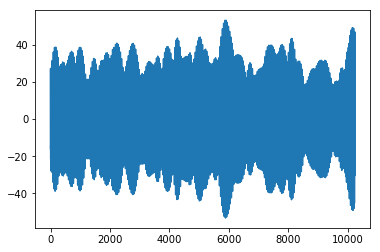

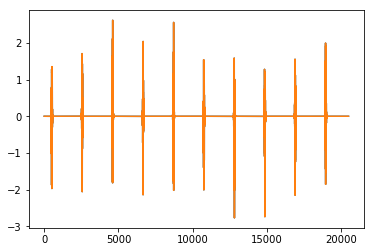

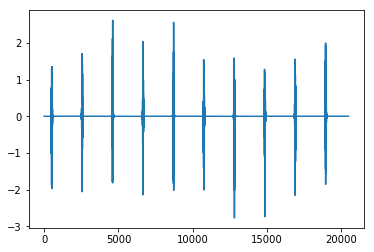

[  0.00000000e+00   9.76467142e-05   1.95293428e-04 ...,   4.99755883e-01
   4.99853530e-01   4.99951177e-01]


In [8]:
a1 = np.fft.rfft(pulseSeries)
# a1 is the real FFT of the pulses
a2 = np.fft.irfft(a1)
plot(a1)
show()
plot(pulseSeries)
plot(a2)
show()
plot(pulseSeries)
show()
print np.fft.rfftfreq(len(a1))

In [9]:
length2 = len(a1)
print(length2)

10241


In [116]:
DM = 200
freq = np.linspace(0,200e6,length2)
freq3 = np.linspace(-200e6,0,length2)
freq2 = np.linspace(-100e6,100e6,length2)
f0 = 120e6 
H = np.exp(1j*2*np.pi*4.148808e9/((freq+f0)*f0**2)*DM*freq**2)
a3 = a1*H
a4 = np.fft.irfft(a3)

In [117]:
def shift(array, int):
    shifted=[]
    for i in array:
        shifted.append(i+int)
    return shifted

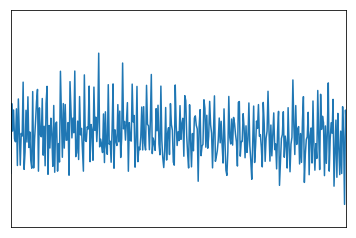

In [118]:
A4 = shift(a4,50)
xlim(0,350)
xticks([])
yticks([])
plot(A4)
show()

In [109]:
sample = [1,2,3,4,5,6,7,8,9,10]
testing = np.asarray(sample)
print(np.fft.rfftfreq(len(testing)))
print testing
Q = (np.fft.rfft(sample))
iQ = np.fft.irfft(Q)

[ 0.   0.1  0.2  0.3  0.4  0.5]
[ 1  2  3  4  5  6  7  8  9 10]


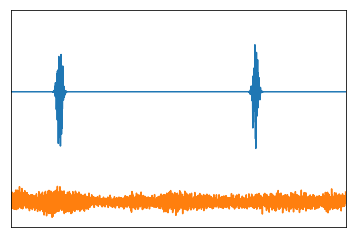

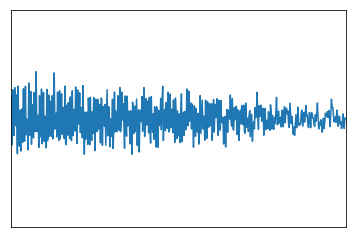

In [111]:
xlim(0,3500)
xticks([])
yticks([])
plot(pulseSeries+4)
plot(a4)
show()
xlim(450,950)
ylim(-1.3,1.3)
xticks([])
yticks([])
plot(a4)
show()

In [12]:
G = np.exp(-1j*2*np.pi*4.148808e9/(f0)*5*DM*freq)
a5 = a1*G
a6 = np.fft.irfft(a5)

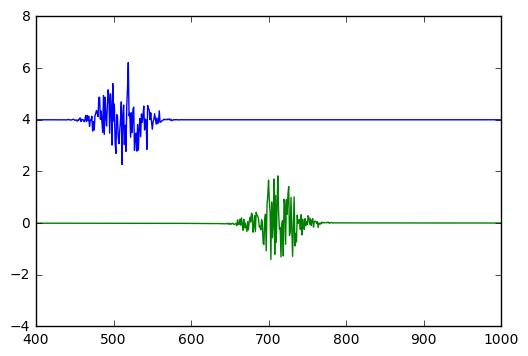

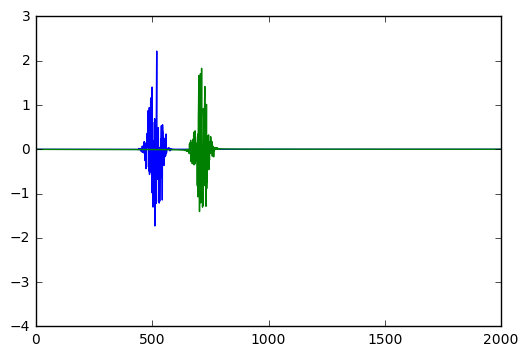

In [19]:
xlim(400,1000)
plot(pulseSeries+4)
plot(a6)
show()
xlim(0,2000)
plot(pulseSeries)
plot(a6)
show()

In [30]:
data_fft=np.fft.rfft(dataSeries**2)
f1,Power1 = sp.signal.periodogram(dataSeries)
f2,Power2 = sp.signal.periodogram(dataSeries**2)
# What's a periodogram? (Estimate of spectral density of a signal) idk what that means

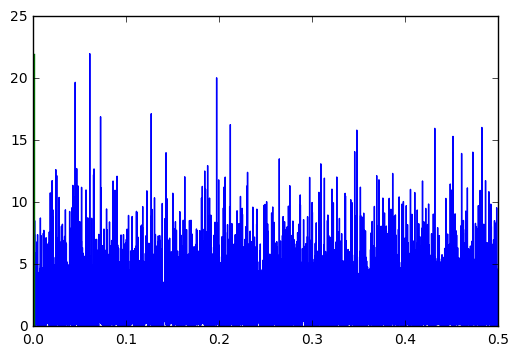

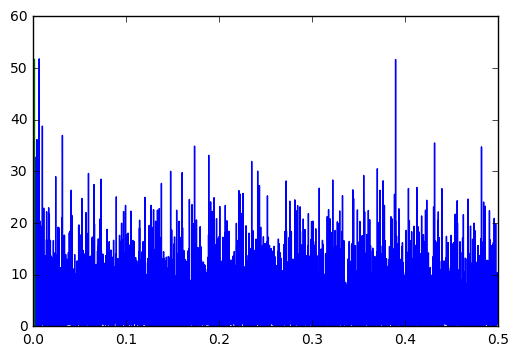

In [21]:
#xlim(0,1e-2)
L=len(Power1)
plot(f1,Power1)
plot(np.ones(10)*1/1024,np.linspace(0,np.amax(Power1),10))
show()
plot(f2,Power2)
plot(np.ones(10)*1/1024,np.linspace(0,np.amax(Power2),10))
show()

In [33]:
i = 100
ToSum = np.zeros((i,10240))
for ii in range(i):
    ToSum[ii,:] = DataSeries(3)
xlim(0,len(ToSum[2,:]))
plot(ToSum[2,:])
show()

ValueError: cannot copy sequence with size 2 to array axis with dimension 10240

In [15]:
Folded = np.sum(ToSum**2,axis=0)
ProdFolded = np.product(ToSum**2,axis=0)

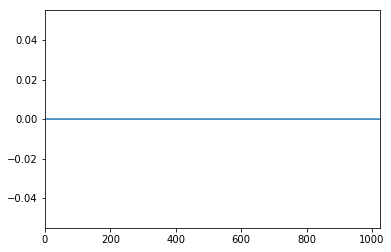

/Users/Poop/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


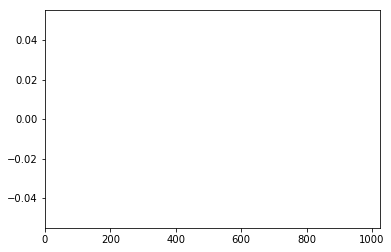

In [16]:
xlim(0,len(Folded)/10)
plot(Folded)
show()
xlim(0,len(Folded)/10)
#ylim(1e-150,1e-20)
plot(np.log(ProdFolded))
show()

In [17]:
np.amin(np.log(ProdFolded**2))

/Users/Poop/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


-inf

/Users/Poop/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


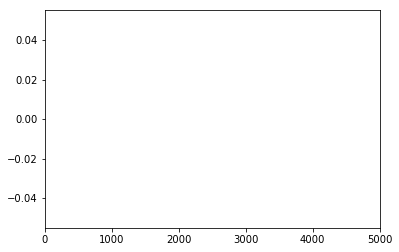

In [18]:
xlim(0,5000)
plot(np.sum(np.log(ToSum**2),axis=0))
show()

In [44]:
def PowerSpectrum(x,step):
    L = len(x)//step
    PS = np.empty((step//2+1,L))
    for ii in range(L):
        start = ii*step
        stop = (ii+1)*step
        #PS[:,ii] = np.fft.rfft(x[start:stop])
        f, PS[:,ii] = sp.signal.periodogram(x[start:stop],12.5e6)
    return PS

In [45]:
P1 = PowerSpectrum(Folded,2**6)

NameError: name 'Folded' is not defined

In [285]:
P1.shape

(33, 160)

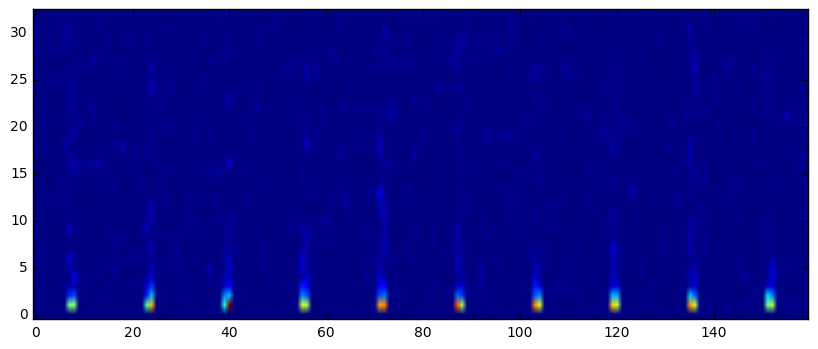

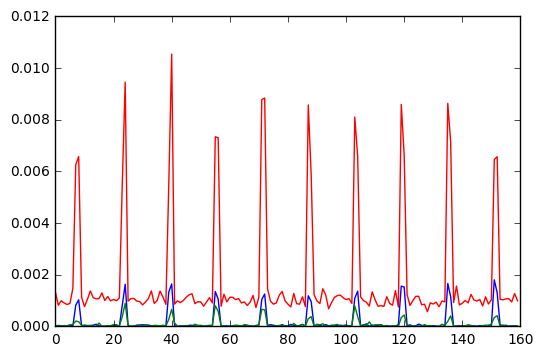

In [302]:
figure(figsize=[10,4])
imshow(P1, origin='lower', aspect='auto')
show()
xlim(0,len(P1[0,:]))
plot(P1[2,:])
plot(P1[3,:])
plot(np.sum(P1,axis=0))
show()

In [289]:
P2= PowerSpectrum(dataSeries,2**7)

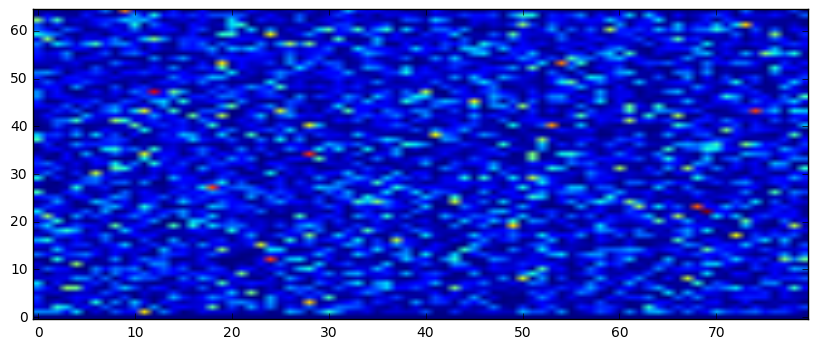

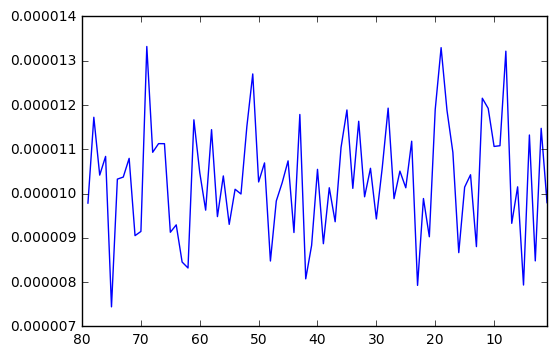

In [290]:
figure(figsize=[10,4])
imshow(P2, origin='lower', aspect='auto')
show()
xlim(len(P2[0,:]))
plot(np.sum(P2,axis=0))
show()

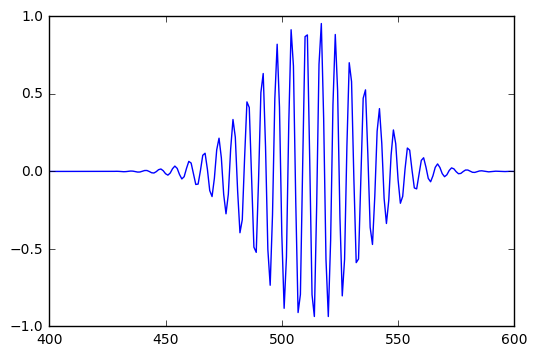

In [48]:
SinG = np.sin(time)*window
xlim(400,600)
plot(SinG)
show()

In [65]:
WPacketTest = np.fft.rfft(SinG)*H
Shifted_WP = np.fft.irfft(WPacketTest)

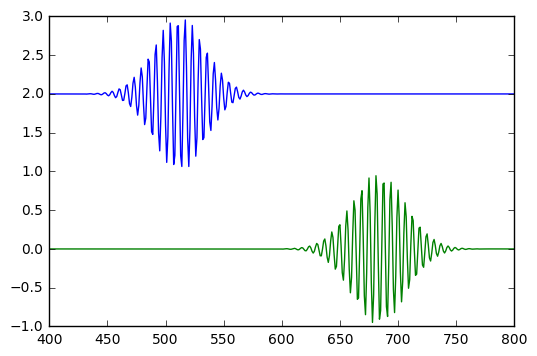

In [67]:
xlim(400,800)
plot(SinG+2)
plot(Shifted_WP)

show()

In [51]:
SinG.shape

(2048,)